# Проект "Определение критериев успешности компьютерных игр для интернет-магазина"

## Содержание

##### Часть 1. Введение:
* [1.1 Цель проекта](#section_1.1)
* [1.2 Набор данных для анализа](#section_1.2)

##### Часть 2. Изучение данных:
* [2.1 Загрузка библиотек и ознакомление с данными](#section_2.1)
* [2.2 Вывод](#section_2.2)

##### Часть 3. Подготовка данных:
* [3.1 Приведение строковых данных к нижнему регистру](#section_3.1)
* [3.2 Обработка пропусков и аномальных значений](#section_3.2)
* [3.3 Расчёт дополнительных параметров](#section_3.3)
* [3.4 Изменение типов данных](#section_3.4)
* [3.5 Вывод](#section_3.5)

##### Часть 4. Исследовательский анализ данных:
* [4.1 Количество выпущенных игр и суммарные продажи за весь период](#section_4.1)
* [4.2 Платформы с максимальными продажами](#section_4.2)
* [4.3 Срок жизни платформ](#section_4.3)
* [4.4 Перспективные платформы](#section_4.4)
* [4.5 Факторы, влияющие на продажи](#section_4.5)
* [4.6 Вывод](#section_4.6)

##### Часть 5. Портрет пользователя для разных регионов:
* [5.1 Северная Америка](#section_5.1)
* [5.2 Европа](#section_5.2)
* [5.3 Япония](#section_5.3)
* [5.4 Вывод](#section_5.4)

##### Часть 6. Проверка гипотез:
* [6.1 Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_6.1)
* [6.2 Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные](#section_6.2)
* [6.3 Вывод](#section_6.3)

##### Часть 7. Общий вывод:
* [7.1 Изучение и подготовка данных](#section_7.1)
* [7.2 Исследовательский анализ данных](#section_7.2)
* [7.3 Портрет пользователя по регионам](#section_7.3)
* [7.4 Проверка гипотез](#section_7.4)

## Часть 1.  Введение:

<a id='section_1.1'></a>
### 1.1 Цель проекта

Интернет-магазин продаёт по всему миру компьютерные игры. Для определения потенциально популярных продуктов и планирования будущих рекламных кампаний необходимо выявить закономерности, определяющие успешность компьютерных игр.

<a id='section_1.2'></a>
### 1.2 Набор данных для анализа

Исследуются исторические данные, доступные из открытых источников, о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 

Описание данных, содержащихся в датасете:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Часть 2. Изучение данных:

<a id='section_2.1'></a>
### 2.1 Загрузка библиотек и ознакомление с данными

В данном разделе мы 
- загрузим необходимые библиотеки, 
- изучим общее количество данных и количество пропущенных данных, а также типы данных методом info(), 
- изучим числовые данные методом describe(), а строковые данные более подробно изучим, применив к соответствующим столбцам метод unique(),
- проверим данные на наличие дубликатов,
- при необходимости переименуем / приведем к единому регистру названия столбцов и строковые данные.

In [1]:
# Импортируем библиотеки и модули, которые нам понадобятся
import pandas as pd

import numpy as np

import scipy as sp
from scipy import stats as st

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Сохраним файл с данными в переменную raw_data
raw_data = pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим первые строки таблицы
raw_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Приведем названия столбцов к нижнему регистру
raw_data.columns = raw_data.columns.str.lower()

In [5]:
# Посмотрим данные методом info()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Посмотрим, содержатся ли пропуски в столбцах name и genre в одних и тех же строках
raw_data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Изучим числовые данные методом describe()
raw_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# Проверим, какие значения содержатся в столбце user_rating, из-за которых тип данных нечисловой
raw_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# Проверим, много ли строк со значением tbd и относятся ли они к какому-то определенному  типу игр,
# например, к недавно выпущенным
raw_data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
# Проверим данные на наличие дубликатов
raw_data.duplicated().sum()

0

In [11]:
# Посмотрим, какие уникальные платформы представлены в данных
raw_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
# Посмотрим, какие уникальные жанры представлены в данных
raw_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
# Посмотрим уникальные рейтинги
raw_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<a id='section_2.2'></a>
### 2.2 Вывод

В ходе первоначального изучения данных мы сделали следующие наблюдения:

- Датасет содержит 16715 строк.
- Имеются единичные пропуски в столбцах `name` и `genre` (2 строки), незначительные пропуски в столбцах `year_of_release` (около 1,5% от общего набора данных). 
- В датасете содержатся значительные пропуски в столбцах `critic_score` (примерно 51% пропусков), `user_score` (40% пропусков) и `rating` (40,5% пропусков). 
- В столбце `user_score` кроме пропусков и числовых оценок в большом количестве строк (почти 25% заполненных строк) есть значение 'tbd', которое, скорее всего, означает, что рейтинг не определен, то есть отсутствует. 
- Дубликаты в наборе данных отсутствуют.
- Данные включают в себя информацию об играх с 1980 года по 2016 год.
- В наборе данных представлены игры 12 различных жанров: спорт, платформеры, игры на время, ролевые, головоломки, игры смешанного жанра, шутеры, симуляторы, экшн, единоборства, приключения, стратегии.
- Датасет содержит информацию об играх для PC и 30 игровых приставок: 
    - от Sony: PS (PlayStation), PS2 (PlayStation 2), PSP (PlayStation Portable), PS3 (PlayStation 3), PSV (PlayStation Vita), PS4 (PlayStation 4);
    - от Nintendo: NES (Nintendo Entertainment System), GB (GameBoy), SNES (Super Nintendo Entertainment System), N64 (Nintendo 64), GBA (GameBoy Advance), GC (GameCube), DS (Nintendo DS), Wii, 3DS (Nintendo 3DS), WiiU;
    - от Sega: GEN (Sega Genesis), GG (Sega Game Gear), SCD (Sega Mega-CD), SAT (Sega Saturn), DC (Sega Dreamcast);
    - от Microsoft: XB (Xbox), X360 (Xbox 360), XOne (Xbox One);
    - от Atari: 2600 (Atari 2600);
    - от NEC: TG16 (TurboGrafx-16), PCFX (PC-FX);
    - от SNK: NG (Neo-Geo);
    - от Bandai: WS (WonderSwan);
    - от Panasonic / Sanyo / GoldStar / 3DO (3DO Interactive Multiplayer).
- В столбце `rating` указаны рейтинги, которые в США и Канаде определяет Entertainment Software Rating Board (ESRB). ESRB была основана в 1994 году, то есть большая часть игр, выпущенных до этого времени, не имеет рейтингов ESRB. Кроме того, в Японии существует собственная организация, определяющая рейтинг компьютерных игр - Computer Entertainment Rating Organisation (CERO), с собственными категориями. Таким образом, возможно, игры, которые продаются в основном на территории Японии, не имеют рейтинга ESRB.
- ESRB выделяет следующие категории игр:
    - EC (Early childhood) — игра подходит для детей от 3 лет и старше,
    - E (Everyone) / K-A (Kids to Adults) до 1997 года — cодержание подходит для возрастной категории от 6 лет и старше,
    - E10+ (Everyone 10 and older) — для всех от 10 лет и старше,
    - T (Teen) — игра подходит для лиц от 13 лет и старше,
    - M (Mature) — игра не подходят для подростков младше 17 лет,
    - AO (Adults Only 18+) — игра только для взрослых старше 18 лет,
    - RP (Rating Pending) — рейтинг ожидается: продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- CERO, в свою очередь, выделяет следующие категории игр:
    - A — продукт пригоден для всех возрастов,
    - B — продукт пригоден для людей от 12 лет и выше,
    - C — продукт пригоден для людей от 15 лет и выше,
    - D — продукт пригоден для людей от 17 лет и выше,
    - Z — продукт пригоден для людей от 18 лет и выше.

## Часть 3. Подготовка данных:

<a id='section_3.1'></a>
### 3.1 Приведение строковых данных к нижнему регистру

Приведем все строковые данные в нашем датасете к нижнему регистру, чтобы легче было к ним обращаться при последующих операциях. 

In [14]:
# Сохраним оригинальный датасет в новую переменную, в которой будем производить изменения
data = raw_data

In [15]:
# Приведем к нижнему регистру все строковые данные в столбцах датасета
raw_data['name'] = raw_data['name'].str.lower()
raw_data['platform'] = raw_data['platform'].str.lower()
raw_data['genre'] = raw_data['genre'].str.lower()
raw_data['rating'] = raw_data['rating'].str.lower()

<a id='section_3.2'></a>
### 3.2 Обработка пропусков и аномальных значений

Как мы уже указали выше в наших данных имееются пропущенные значения. Обработаем их следующим образом:

- Удалим строки с пропусками в столбцах `name` и `genre` и в столбце `year_of_release` - количество пропусков небольшое, а заполнение достоверными данными потребует больших трудозатрат.
- Пропуски в столбцах `critic_score`, `user_score` и `rating`, скорее всего, означают, что игра не имеет оценки критиков и пользователей и для нее не определен рейтинг ESRB. Пропуски в столбце `rating` заполним значением 'unrated' (без рейтинга). Пропуски в столбцах `critic_score` и `user_score` мы не можем заполнить данным значением, так как для анализа нам необходимо, чтобы данные в этих столбцах имели тип float. Заполнять пропуски другими значениями не будем, так как это может повлиять на результаты нашего анализа.

Значения tbd, которые мы обнаружили в столбце `user_score` на предыдущем этапе, заменим на None, чтобы привести данные в столбцу к корректному типу float.

In [16]:
# Заменим значение tbd в столбце user_score на None
data['user_score'] = data['user_score'].replace('tbd', None)

In [17]:
# Заполним пропущенные значения в столбце rating
data['rating'] = data['rating'].fillna('unrated')

In [18]:
# Удалим строки с пропусками в столбцах name и year_of_release
data = data.dropna(subset=['year_of_release', 'name']).reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
index              16444 non-null int64
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         8609 non-null object
rating             16444 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


<a id='section_3.3'></a>
### 3.3 Расчёт дополнительных параметров

Для анализа популярности игр по всем регионам дополним данные столбцом с суммарными продажами по всему миру.

In [19]:
# Добавим столбец overall_sales, в котором вычислим суммарные продажи для всех регионов
data['overall_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Проверим, что получилось
data.sort_values(by='overall_sales', ascending=False).head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
0,0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e,82.54
1,1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e,32.77
4,4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


<a id='section_3.4'></a>
### 3.4 Изменение типов данных

Заменим тип данных в столбцах:
- `year_of_release` и `critic_score` на целочисленный,
- `user_score` на вещественный,
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales` и `otherall_sales` с float64 на float32, который занимает меньший объем памяти (это может увеличить скорость обработки при работе с большим объемом данных).

In [20]:
data['year_of_release'] = data['year_of_release'].astype('uint16')
data['user_score'] = data['user_score'].astype('float32')
data['na_sales'] = data['na_sales'].astype('float32')
data['eu_sales'] = data['eu_sales'].astype('float32')
data['jp_sales'] = data['jp_sales'].astype('float32')
data['other_sales'] = data['other_sales'].astype('float32')
data['overall_sales'] = data['overall_sales'].astype('float32')
data['critic_score'] = data['critic_score'].astype(pd.Int32Dtype())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
index              16444 non-null int64
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null object
na_sales           16444 non-null float32
eu_sales           16444 non-null float32
jp_sales           16444 non-null float32
other_sales        16444 non-null float32
critic_score       7983 non-null Int32
user_score         8609 non-null float32
rating             16444 non-null object
overall_sales      16444 non-null float32
dtypes: Int32(1), float32(6), int64(1), object(4), uint16(1)
memory usage: 1.1+ MB


<a id='section_3.5'></a>
### 3.5 Вывод

Мы подготовили данные к дальнейшему исследовательскому анализу, а именно:

- обработали пропущенные и аномальные значения,
- заменили тип данных, где это было необходимо,
- рассчитали дополнительные значения, которые нам понадобятся в дальнейшем.

## Часть 4. Исследовательский анализ данных:

<a id='section_4.1'></a>
### 4.1 Количество выпущенных игр и суммарные продажи за весь период

Приступим к исследовательскому анализу и в первую очередь изучим, какое количество игр выпускалось в разные годы за весь период, а также их суммарные продажи.

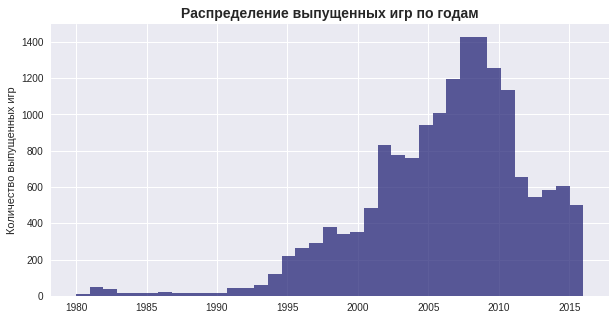

In [21]:
# Посмотрим распределение выпущенных игр по годам за весь период
plt.figure(figsize=(10,5))
plt.hist(data['year_of_release'], bins=37, histtype='bar', color='midnightblue', alpha=0.7)
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение выпущенных игр по годам', fontsize=14, fontweight='bold')
plt.show()

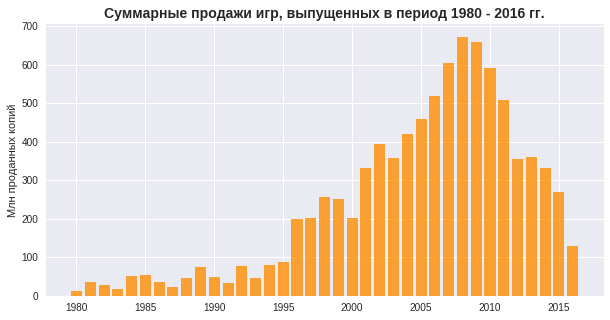

In [22]:
# Посмотрим суммарные продажи за весь период
annual_sales = data.groupby('year_of_release').agg({'overall_sales':'sum'}).reset_index()
height = annual_sales['overall_sales']
plt.figure(figsize=(10,5))
plt.bar(x='year_of_release', height=height, data=annual_sales, color='darkorange', alpha=0.8)
plt.ylabel('Млн проданных копий')
plt.title('Суммарные продажи игр, выпущенных в период 1980 - 2016 гг.', fontsize=14, fontweight='bold')
plt.show()

Видим, что с 1980 года по 1993 год выпускалось незначительное количество компьютерных игр. С 1994 года по 2001 год количество выпускаемых игр постепенно увеличивается и вырастает примерно в 7 раз, а с 2002 год по 2008 год вырастает еще более чем в 2,5 раза. Начиная с 2009 года наблюдается падение количества выпускаемых компьютерных игр. 

График продаж примерно повторяет движение графика выпускаемых игр.

<a id='section_4.2'></a>
### 4.2 Платформы с максимальными продажами

Мы увидели, что, начиная с 2001 года, произошел значительный рост количества выпускаемых игр и количества проданных копий. Посмотрим, какие платформы отличались наиболее высокими продажами и более детально проанализируем продажи по платформам в актуальный период - с 2001 года по настоящее время. 

In [23]:
# Сгруппируем данные по платформам и посчитаем суммарные продажи, также включим в таблицу минимальный год выпуска, 
# который, скорее всего, совпадает с годом выпуска игровой платформы 
overall_sales = (data.groupby('platform').
                 agg({'overall_sales': 'sum', 'year_of_release': 'min'}).
                 sort_values(by='overall_sales', ascending=False).
                 reset_index()
                           )
overall_sales

,platform,overall_sales,year_of_release
0,ps2,1233.560059,2000
1,x360,961.239990,2005
2,ps3,931.340027,2006
3,wii,891.179993,2006
4,ds,802.779968,1985
5,ps,727.580017,1994
6,ps4,314.140015,2013
7,gba,312.880005,2000
8,psp,289.529999,2004
9,3ds,257.809998,2011


За изучаемый период наиболее коммерчески успешными стали платформы PS 2 (более 1233 млн проданных копий), Xbox 360 (более 961 млн проданных копий), PS 3 (продажи - более 931 млн копий), Wii (продажи - 891 млн копий), DS (примерно 803 млн копий) и PS (более 727 млн копий).

Будем считать успешными платформы с продажами более 100 млн копий. 

После определения срока жизни платформ на следующем шаге мы вернулись на данный шаг и добавили к срезу платформы, стартовавшие после 2010 года - так как, возможно, они еще не достигли своего максимального уровня продаж. 

In [24]:
# Отберем платформы с продажами более 100 млн копий, которые появились, начиная с 2000 года, 
# либо платформы, стартовавшие после 2010 года
max_sales = overall_sales.query('(overall_sales > 100 & year_of_release >= 2000) or (year_of_release > 2010)')
max_sales

,platform,overall_sales,year_of_release
0,ps2,1233.560059,2000
1,x360,961.239990,2005
2,ps3,931.340027,2006
3,wii,891.179993,2006
6,ps4,314.140015,2013
7,gba,312.880005,2000
8,psp,289.529999,2004
9,3ds,257.809998,2011
12,xb,251.569992,2000
16,gc,196.729996,2001


In [25]:
# Сделаем таблицу с ежегодными суммарными продажами по каждой платформе за актуальный период
recent_sales = (data.
                query('year_of_release >= 2001 & platform.isin(@max_sales.platform)').
                pivot_table(index='year_of_release', columns='platform', values='overall_sales', aggfunc='sum')
               )

# Заполним пропущенные нулями для более эстетичной визуализации
recent_sales = recent_sales.fillna(0)

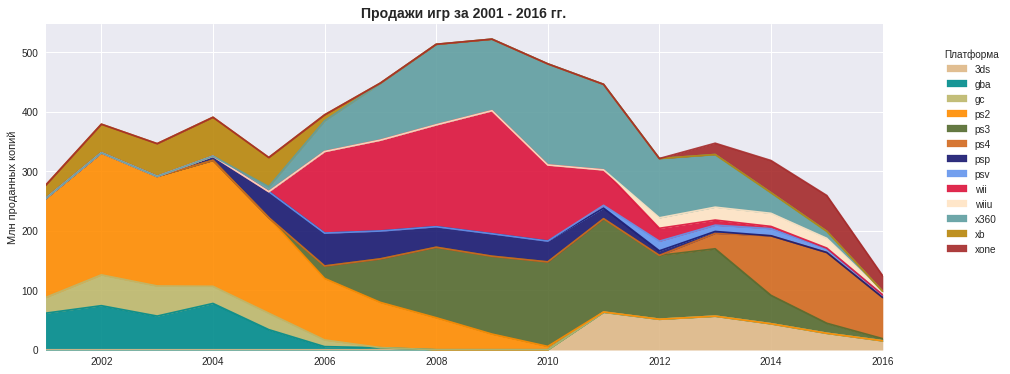

In [26]:
# Построим диаграмму с областями накопления, чтобы посмотреть динамику продаж по платформам по годам
colors = ['burlywood', 'darkcyan', 'darkkhaki', 
          'darkorange', 'darkolivegreen', 'chocolate', 
          'midnightblue', 'cornflowerblue', 'crimson', 
          'bisque', 'cadetblue', 'darkgoldenrod',
          'brown']
recent_sales.plot.area(figsize=(15,6), alpha=0.9, colors=colors)
plt.title('Продажи игр за 2001 - 2016 гг.', fontsize=14, fontweight='bold')
plt.ylabel('Млн проданных копий')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.15, 0.95), loc='upper right', title='Платформа') # Вынесем легенду за пределы графика
plt.show()

Мы видим, что продажи одной и той же платформы меняются год от года - возрастая через какое-то время после появления платформы, а потом снижаясь до нулевого уровня по мере устаревания платформы и появления новых платформ. 

<a id='section_4.3'></a>
### 4.3 Срок жизни платформ

Посмотрим, сколько же в среднем "живут" платформы. Будем считать сроком жизни платформы период, в который ежегодные продажи выпущенных для нее игр составляли более 15 млн копий.

In [27]:
# Создадим сводную таблицу с продажами по годам для всех платфор и отберем из нее 
# данные после 2001 года с продажами более 15 млн
platform_active_sales = (data.groupby(['platform', 'year_of_release']).
                         agg({'overall_sales':'sum'}).
                         query('year_of_release >=2001 & overall_sales >= 15').
                         reset_index()
                         )

# Соберем в сводную таблицу данные по минимальному году и максимальному году с продажами более 15 млн
platform_lifespan = platform_active_sales.groupby('platform').agg({'year_of_release': ['min', 'max']}).reset_index()
# Переименуем столбцы
platform_lifespan.columns = ['platform', 'high_sales_beginning', 'high_sales_end']
# Рассчитаем разницу между максимальным и манимальным годом - это будет срок жизни платформы 
platform_lifespan['high_sales_period'] = platform_lifespan['high_sales_end'] - platform_lifespan['high_sales_beginning']
# Удалим из набора строки, где:
# период продаж заканчивается 2016 годом (так как мы не уверены, что высокие продажи не продолжатся в следующем году),
# период продаж начинается в 2001 году (так как возможно высокие продажи были и раньше, мы просто не включили их в срез),
# период высоких продаж равен 0 (платформа не выходила на высокие продажи),
# период для платформы PC, так как у нее всегда невысокие, но стабильные продажи
platform_lifespan_valid_data = (platform_lifespan.
                                query('high_sales_end != 2016 & \
                                high_sales_beginning != 2001 & \
                                high_sales_period != 0 & \
                                platform != "pc"')
                               )
platform_lifespan_valid_data

,platform,high_sales_beginning,high_sales_end,high_sales_period
1,ds,2004,2011,7
7,ps3,2006,2015,9
9,psp,2005,2011,6
11,wii,2006,2012,6
12,wiiu,2012,2015,3
13,x360,2006,2014,8


In [28]:
# Рассчитаем медианный срок жизни платформ
platform_lifespan_median = platform_lifespan_valid_data['high_sales_period'].median()
print('Медианный период продаж свыше 15 млн копий в год составляет {} лет.'
      .format(platform_lifespan_median))

Медианный период продаж свыше 15 млн копий в год составляет 6.5 лет.


<a id='section_4.4'></a>
### 4.4 Перспективные платформы

Изучим, игры для каких платформ могут принести прибыль в следующем году. 

Для начала отберем платформы, "срок жизни" которых в следующем году еще не истечет. Также добавим PC, так как продажи игр для персональных компьютеров хоть невысокие, но довольно стабильные.

In [29]:
# Отберем "живые" платформы
actual_platforms = (overall_sales.
                    query('year_of_release > (2017 - @platform_lifespan_median) or platform == "pc"')
                    [['platform', 'year_of_release']].
                    reset_index()
                    )
actual_platforms

,index,platform,year_of_release
0,6,ps4,2013
1,9,3ds,2011
2,10,pc,1985
3,17,xone,2013
4,19,wiiu,2012
5,20,psv,2011


In [30]:
# Сделаем срез данных по "живым" платформам
actual_data = data.query('platform.isin(@actual_platforms.platform) & year_of_release > (2017 - @platform_lifespan_median)')

In [31]:
# Сделаем сводную таблицу с продажами для каждой платформы по годам 
ad_pivot = (actual_data.
            pivot_table(index='year_of_release', columns='platform', values='overall_sales', aggfunc='sum').
            fillna(0)
            )
ad_pivot

platform,3ds,pc,ps4,psv,wiiu,xone
year_of_release,,,,,,
2011,63.200001,35.029999,0.000000,4.630000,0.000000,0.000000
2012,51.360001,23.219999,0.000000,16.190001,17.559999,0.000000
2013,56.570000,12.380000,25.990000,10.590000,21.650000,18.960001
2014,43.760002,13.280000,100.000000,11.900000,22.030001,54.070000
2015,27.779999,8.520000,118.900002,6.250000,16.350000,60.139999
2016,15.140000,5.250000,69.250000,4.250000,4.600000,26.150000


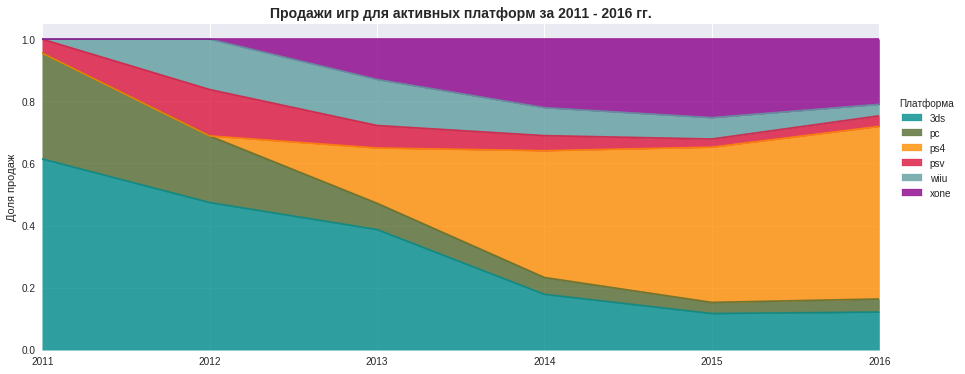

In [32]:
# Сделаем сводную таблицу с долей продаж для каждой платформы по годам 
ad_pivot_percentage = ad_pivot.divide(ad_pivot.sum(axis=1), axis=0)

# Построим диаграмму с областями накопления, чтобы наглядно увидеть, какую долю продаж имела каждая из активных платформ
# за период с 2011 года
colors = ['darkcyan', 'darkolivegreen', 'darkorange', 'crimson',
          'cadetblue', 'darkmagenta']
ad_pivot_percentage.plot.area(figsize=(15,6), colors=colors, alpha=0.8)
plt.title('Продажи игр для активных платформ за 2011 - 2016 гг.', fontsize=14, fontweight='bold')
plt.ylabel('Доля продаж')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.1, 0.8), loc='upper right', title='Платформа') # Вынесем легенду за пределы графика
plt.show()

Исходя из срока жизни платформ, актуальными в настоящее время можно считать следующие платформы:

*PS 4, 3-DS, PC, Xbox One, Wii U и PS Vita*. 

Наибольший объем продаж приходится на PS 4, 3-DS и Xbox One. При этом - учитывая снижение общего объема продаж - заметен спад в общих продажах доли игр для платформ 3-DS, PC, PS Vita, Wii U; доля продаж Xbox One практически стабильна последние несколько лет, а по PS 4 есть даже небольшой рост. 

In [33]:
actual_data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
31,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
40,40,mario kart 7,3ds,2011,racing,5.03,4.02,2.69,0.91,85,8.2,e,12.65
42,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
47,47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unrated,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,16702,storm: frontline nation,pc,2011,strategy,0.00,0.01,0.00,0.00,60,7.2,e10+,0.01
16432,16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16436,16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16441,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01


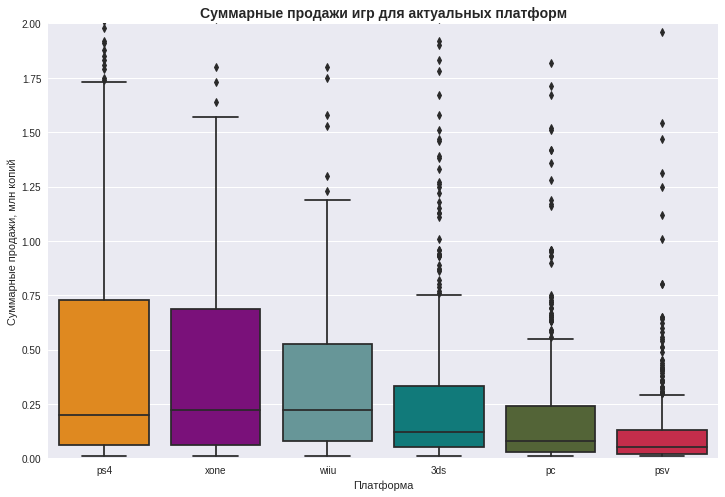

In [39]:
# Построим ящики с усами для всех актуальных платформ
plt.figure(figsize=(12, 8))

palette = {'3ds': 'darkcyan', 
           'pc': 'darkolivegreen', 
           'ps4': 'darkorange', 
           'psv': 'crimson', 
           'wiiu': 'cadetblue', 
           'xone': 'darkmagenta'}
sns.boxplot(x='platform', 
            y='overall_sales', 
            data=actual_data, 
            order=['ps4', 'xone', 'wiiu', '3ds', 'pc', 'psv'], 
            palette=palette)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн копий')
plt.ylim(0, 2)
plt.title('Суммарные продажи игр для актуальных платформ', fontsize=14, fontweight='bold')
plt.show()

Исходя из графика, можно заметить, что, несмотря на то, что наибольший объем продаж приходится на PS 4, 3-DS и Xbox One, медианные продажи игр для платформы Wii U находятся на уровне Xbox One и превышают медиану лидера продаж PS 4.

<a id='section_4.5'></a>
### 4.5 Факторы, влияющие на продажи

Рассмотрим на примере платформы PS4, влияют ли оценки пользователей и критиков на продажи игр. 

In [40]:
# Сделаем срез необходимых данных
ps4_data = actual_data.query('platform == "ps4"')
ps4_data_sm = ps4_data[['name', 'overall_sales', 'user_score', 'critic_score']]
ps4_data_sm.columns = [['Название', 'Суммарные продажи', 'Оценки пользователей', 'Оценки критиков']]

# Посмотрим корреляцию методом corr() 
ps4_data_sm.corr()

,Суммарные продажи,Оценки пользователей,Оценки критиков
Суммарные продажи,1.000000,-0.027428,0.406568
Оценки пользователей,-0.027428,1.000000,0.556037
Оценки критиков,0.406568,0.556037,1.000000


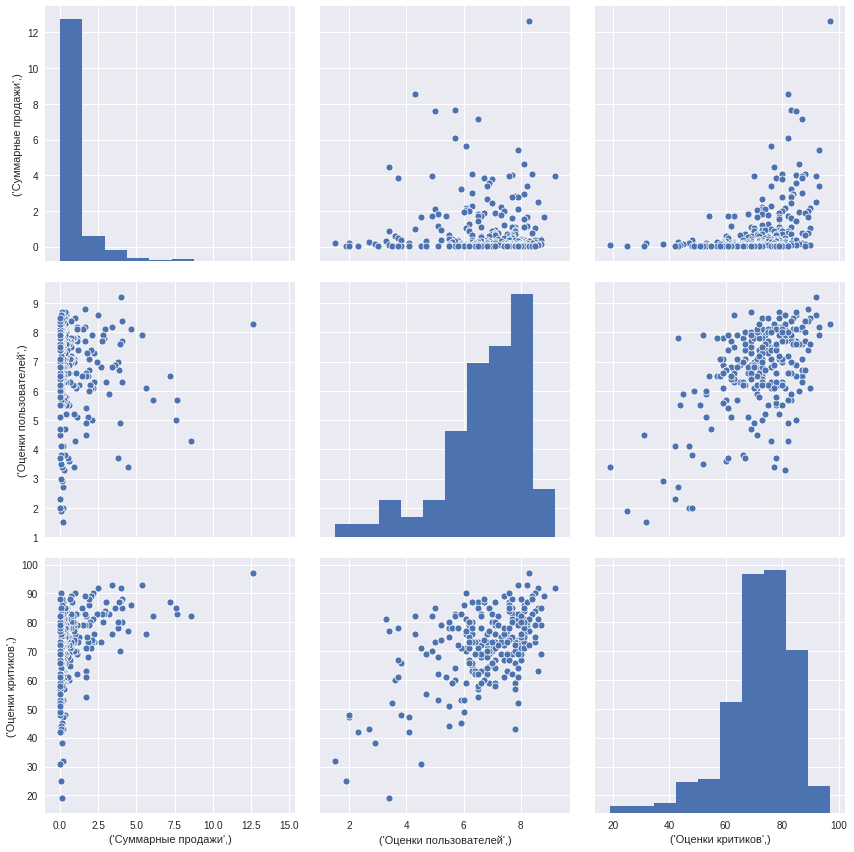

In [41]:
# Построим матрицу рассеяния
sns.pairplot(ps4_data_sm, 
             size=4, 
             dropna=True)
plt.show()

Анализ коэффициента Пирсона показал слабую корреляцию уровня продаж с оценками критиков (на уровне 0,4) и практически полное отсутствие корреляции с оценками пользователей.

Посмотрим, насколько эти выводы актуальны для всего набора данных.

In [43]:
# Выберем столбцы для анализа корреляции
actual_data_correlation = actual_data[['name', 'overall_sales', 'user_score', 'critic_score']]
actual_data_correlation.columns = [['Название', 'Суммарные продажи', 'Оценки пользователей', 'Оценки критиков']]

# Посмотрим корреляцию методом corr() 
actual_data_correlation.corr()

,Суммарные продажи,Оценки пользователей,Оценки критиков
Суммарные продажи,1.000000,0.050049,0.308861
Оценки пользователей,0.050049,1.000000,0.516579
Оценки критиков,0.308861,0.516579,1.000000


Видим схожую ситуацию для всего датасета - слабая корреляция продаж с оценками критиков и почти полное отсутствие корреляции с оценками пользователей.

Теперь проанализируем, игр каких жанров продается больше всего. Для начала посмотрим медиану продаж по жанрам, затем изучим суммарные продажи в актуальном периоде с разбивкой по жанрам.

In [58]:
# Сделаем сводную таблицу - медианы продаж и количество игр по жанрам
sales_by_genre = (actual_data.
                  groupby('genre').
                  agg({'overall_sales': 'median', 'name': 'count'}).
                  sort_values(by='overall_sales', ascending=False).
                  reset_index()
                 )

sales_by_genre.columns = ['genre', 'median_sales', 'games_count'] 
sales_by_genre

,genre,median_sales,games_count
0,shooter,0.410,162
1,platform,0.210,77
2,sports,0.195,164
3,role-playing,0.155,284
4,racing,0.130,92
5,fighting,0.120,63
6,action,0.110,717
7,misc,0.110,146
8,simulation,0.100,87
9,puzzle,0.065,40


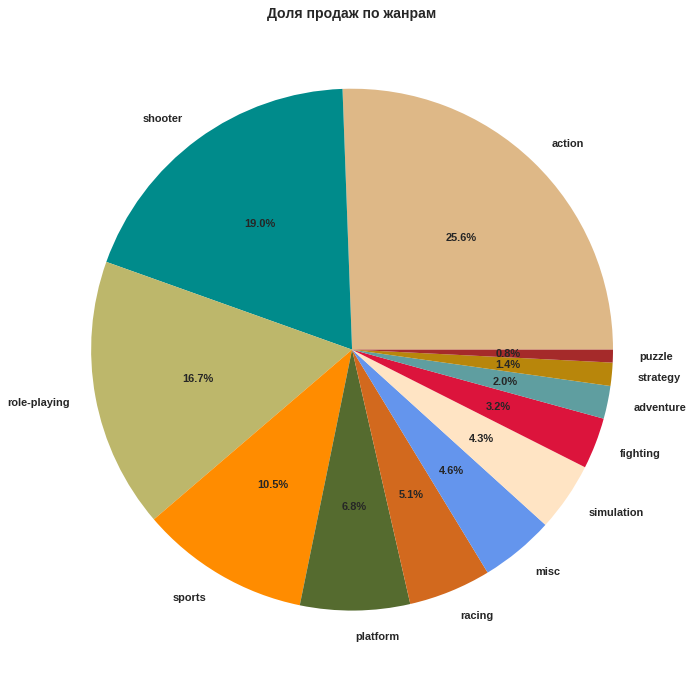

In [53]:
# Сделаем сводную таблицу с общими продажами по жанрам 
overall_sales_by_genre = (actual_data
                          .groupby('genre')
                          .agg({'overall_sales': 'sum'})
                          .sort_values(by='overall_sales', ascending=False)
                          )

# Визуализируем данные с помощью диаграммы "пирог"
colors = ['burlywood', 'darkcyan', 'darkkhaki', 
          'darkorange', 'darkolivegreen', 'chocolate', 
          'cornflowerblue', 'bisque', 'crimson', 
          'cadetblue', 'darkgoldenrod', 'brown']
plt.figure(figsize=(12, 12))
plt.pie('overall_sales', 
        colors=colors, 
        labels=overall_sales_by_genre.index.to_list(),
        textprops={'fontsize': 11, 'fontweight': 'bold'},
        autopct='%1.1f%%', 
        pctdistance=0.6, 
        data=sales_by_genre)
plt.title('Доля продаж по жанрам', fontsize=14, fontweight='bold')
plt.show()

Анализ показывает, что топ-5 с наиболее высокими медианами продаж игр - это жанры Shooter, Platform, Sports, Role-playing и Racing; три аутсайдера - Puzzle, Strategy и Adventure.

По суммарным продажам лидируют Action, Shooter, Role-playing, Sports; жанры с наименьшими суммарными продажами совпадают с жанрами с наименьшими медианными продажами - Puzzle, Strategy, Adventure.  

<a id='section_4.6'></a>
### 4.6 Вывод

Проведя исследовательский анализ данных можно сделать следующие выводы и наблюдения:
- С 1980 года по 1993 год выпускалось незначительное количество компьютерных игр. С 1994 года по 2001 год количество выпускаемых игр постепенно увеличивается и вырастает примерно в 7 раз, а с 2002 год по 2008 год вырастает еще более чем в 2,5 раза. Начиная с 2009 года наблюдается падение количества выпускаемых компьютерных игр. График продаж примерно повторяет движение графика выпускаемых игр.
- За изучаемый период наиболее коммерчески успешными стали платформы PS 2 (около 1233 млн проданных копий), Xbox 360 (более 961 млн проданных копий), PS 3 (продажи - более 931 млн копий), Wii (продажи - 891 млн копий), DS (примерно 803 млн копий) и PS (более 727 млн копий).
- Продажи одной и той же платформы меняются год от года - возрастая через какое-то время после появления платформы, а потом снижаясь до нулевого уровня по мере устаревания платформы и появления новых платформ. Если считать "сроком жизни" платформы период, в течение которого ее продажи составляют более 15 млн копий в год, то платформы в последнее время "живут" примерно 6,5 лет.
- Исходя из срока жизни платформ, актуальными в настоящее время можно считать такие платформы, как PS 4, 3-DS, PC, Xbox One, Wii U и PS Vita. Наибольший объем продаж приходится на PS 4, 3-DS и Xbox One. При этом - учитывая снижение общего объема продаж - заметен спад в общих продажах доли игр для платформ 3-DS, PC , PS Vita, Wii U; доля продаж Xbox One практически стабильна последние несколько лет, а по PS 4 есть даже небольшой рост.
- Несмотря на то, что наибольший объем продаж приходится на PS 4, 3-DS и Xbox One, необходимо отметить, что медианные продажи игр для платформы Wii U находятся на уровне Xbox One и превышают медиану лидера продаж PS 4.
- Анализ коэффициента Пирсона показал слабую корреляцию уровня продаж с оценками критиков (на уровне 0,3 - 0,4) и практически полное отсутствие корреляции с оценками пользователей.
- Топ-5 с наиболее высокими медианами продаж игр - это жанры Shooter, Platform, Sports, Role-playing и Racing; три аутсайдера - Puzzle, Strategy и Adventure. По суммарным продажам лидируют Action (26%), Shooter (19%), Role-playing (17%), Sports (11%); жанры с наименьшими суммарными продажами совпадают с жанрами с наименьшими медианными продажами - Puzzle, Strategy, Adventure.

## Часть 5. Портрет пользователя для разных регионов:

Определим для пользователя каждого региона - Северая Америка, Европа, Япония - следующие показатели:
- 5 самых популярных платформ,
- 5 самых популярных жанров,
- влияние рейтинга ESRB на продажи.

Так как мы будем анализировать одни и те же показатели для 3 регионов, напишем функции, чтобы не повторять однотипные операции.

In [40]:
# Напишем функцию для вывода таблицы с 5 топ-платформами в регионе с абсолютными и относительными показателям продаж
def region_top_platforms(series):
    region_top_platforms = (actual_data.
                            groupby('platform').
                            agg({series: 'sum'}).
                            sort_values(by=series, ascending=False).
                            reset_index()
                            )
    region_top_platforms['sales_part'] = round(region_top_platforms[series] / region_top_platforms[series].sum(), 2)
    return region_top_platforms.head() 

In [41]:
# Напишем функцию для вывода таблицы с 5 топ-жанрами в регионе с абсолютными и относительными показателям продаж
def region_top_genres(series):
    region_top_genres = (actual_data.
                         groupby('genre').
                         agg({series: 'sum'}).
                         sort_values(by=series, ascending=False).
                         reset_index()
                         )
    region_top_genres['sales_part'] = round(region_top_genres[series] / region_top_genres[series].sum(), 2)
    return region_top_genres.head() 

In [42]:
# Напишем функцию для вывода диаграммы пирог с распределением долей продаж в регионе в зависимости от рейтинга ESRB
def esrb_rating_sales(series):
    sales_by_esrb_rating = (actual_data
                            .groupby('rating')
                            .agg({series: 'sum'})
                            .sort_values(by=series, ascending=False)
                            )
    
    colors = ['darkcyan', 'darkorange', 'darkolivegreen', 
              'cornflowerblue', 'crimson', 'cadetblue', 'darkgoldenrod']
    
    plt.figure(figsize=(6, 6))
    plt.pie(series, 
            colors=colors, 
            labels=sales_by_esrb_rating.index.to_list(),
            textprops={'fontsize': 11, 'fontweight': 'bold'},
            autopct='%1.1f%%', 
            pctdistance=0.6, 
            data=sales_by_esrb_rating
            )
    plt.title('Доля продаж по рейтингу', fontsize=14, fontweight='bold')
    return plt.show()

<a id='section_5.1'></a>
### 5.1 Северная Америка

Проанализируем данные по Северной Америке.

In [43]:
# Посмотрим топ-платформы
region_top_platforms('na_sales')

,platform,na_sales,sales_part
0,ps4,108.739998,0.30
1,xone,93.120003,0.26
2,3ds,82.650002,0.23
3,wiiu,38.099998,0.10
4,pc,29.879999,0.08


In [44]:
# Посмотрим жанры с максимальными продажами
region_top_genres('na_sales')

,genre,na_sales,sales_part
0,action,93.409996,0.26
1,shooter,81.820000,0.22
2,role-playing,52.000000,0.14
3,sports,40.040001,0.11
4,platform,26.969999,0.07


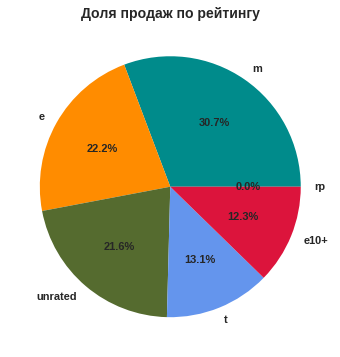

In [45]:
# Посмотрим распределение долей продаж в зависимости от рейтинга
esrb_rating_sales('na_sales')

<a id='section_5.2'></a>
### 5.2 Европа

Проведем аналогичный анализ данных для продаж в Европе.

In [46]:
# Посмотрим топ-платформы
region_top_platforms('eu_sales')

,platform,eu_sales,sales_part
0,ps4,141.089996,0.40
1,3ds,61.270000,0.18
2,pc,56.700001,0.16
3,xone,51.590000,0.15
4,wiiu,25.129999,0.07


In [47]:
# Посмотрим жанры с максимальными продажами
region_top_genres('eu_sales')

,genre,eu_sales,sales_part
0,action,90.209999,0.26
1,shooter,72.919998,0.21
2,sports,43.660000,0.13
3,role-playing,42.910000,0.12
4,platform,22.299999,0.06


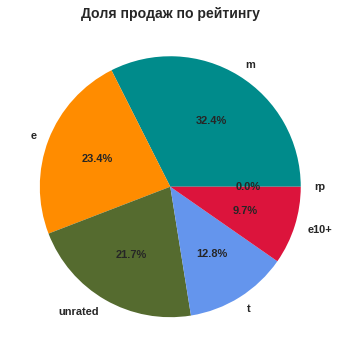

In [48]:
# Посмотрим распределение долей продаж в зависимости от рейтинга
esrb_rating_sales('eu_sales')

<a id='section_5.3'></a>
### 5.3 Япония

Проанализируем данные для Японии.

In [49]:
# Посмотрим топ-платформы
region_top_platforms('jp_sales')

,platform,jp_sales,sales_part
0,3ds,100.620003,0.66
1,psv,21.840000,0.14
2,ps4,15.960000,0.11
3,wiiu,13.010000,0.09
4,xone,0.340000,0.00


In [50]:
# Посмотрим жанры с максимальными продажами
region_top_genres('jp_sales')

,genre,jp_sales,sales_part
0,role-playing,54.189999,0.36
1,action,36.540001,0.24
2,platform,10.710000,0.07
3,misc,10.700000,0.07
4,simulation,10.639999,0.07


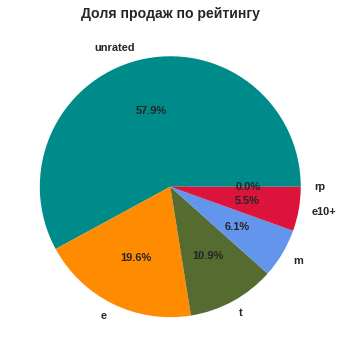

In [51]:
# Посмотрим распределение долей продаж в зависимости от рейтинга
esrb_rating_sales('jp_sales')

<a id='section_5.4'></a>
### 5.4 Вывод

По результатам проведенного анализа можно сделать следующие выводы о предпочтениях пользователей в различных регионах:

**Северная Америка**

1. Пользователи предпочитают платформы PS 4 (30% продаж), Xbox One (26% продаж), 3-DS (23% продаж). С большим отставанием за ними следуют Wii U (10% продаж) и PC (8% продаж).
2. Наиболее популярные жанры - Action c 26% продаж и Shooter c 22% продаж. Также в первую пятерку входят значительно менее популярные игры жанров Role-playing (14% продаж), Sports (11% продаж) и Platform (7% продаж).
3. С учетом рейтинга ESRB максимальные продажи зафиксированы среди категорий М "для лиц старше 17 лет" (31%) и Е "для возрастной категории 6+" (22%). Для категории T "для лиц старше 13 лет" и для Е10+ "для всех от 10 лет" продажи составляют 13% и 12% от общего объема продаж. Остальные игры не имеют рейтинга ESRB.

**Европа**

1. В Европе с большим отрывом лидируют продажи игр для платформы PS 4 (40% от общего объема продаж). Далее с большим отставанием от PS 4 и близко друг к другу идут 3-DS (18% продаж), Xbox One (16% продаж), Wii U (15% продаж). Игры для PC находятся на последнем месте в топ-5 с 7% продаж.
2. Ситуация с жанрами очень близка к ситуации в Северной Америке: наиболее популярные жанры - Action c 26% продаж и Shooter c 21% продаж. Затем следуют значительно менее популярные игры жанров Sports (13% продаж), Role-playing (12% продаж) и Platform (6% продаж).
3. Как и в Северной Америке, рейтинг в Европе схожим образом влияет на продажи: чем выше возраст пользователя, тем больше продажи. С учетом рейтинга ESRB максимальные продажи зафиксированы среди категорий М "для лиц старше 17 лет" (32%) и Е "для возрастной категории 6+" (23%). Для категории T "для лиц старше 13 лет" и для Е10+ "для всех от 10 лет" продажи составляют 13% и 10% от общего объема продаж. Остальные игры не имеют рейтинга ESRB.

**Япония**

1. Портрет японского любителя компьютерных игр существенно отличается от предыдущих двух регионов.
2. 66% продаж японского рынка компьютерных игр приходится на игры для 3-DS, 14% на портативную PS Vita, 11% на PS 4 и 9% на Wii U.
3. Из жанров лидирует Role-playing c 66% продаж и Action с 24%. Замыкают пятерку жанры Platform, Miscellaneous и Simulation c 7% продаж каждый.
4. 58% приходится на игры, не имеющие рейтинга ESRB. Скорее всего, это связано с тем, что в Японии имеется собственная организация, определяющая рейтинг игр, и собственная система рейтингов. Из игр, имеющих рейтинг, 20% приходится на игры с рейтингом Е "для возрастной категории 6+", 11% на Т "для лиц старше 13 лет", 6% на М "для лиц старше 17 лет" и 5% на E10+ "для всех от 10 лет".  

## Часть 6. Проверка гипотез:

<a id='section_6.1'></a>
### 6.1 Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для начала сформулируем нулевую гипотезу.

**Нулевая гипотеза:** средние пользовательские рейтинги игр платформы Xbox One равны средним пользовательским рейтингам игр для платформы PC.

**Альтернативная гипотеза:** средние пользовательские рейтинги игр платформы Xbox One отличаются от средних пользовательских рейтингов игр для платформы PC.

Для проверки гипотезы проведем t-тест. Но сначала проверим дисперсию двух выборок.

In [52]:
# Напишем функцию для расчета дисперсии различных характеристик
def variance_estimate(query, series, title):
    data_for_var_est = actual_data.query(query)
    var_est = np.var(data_for_var_est[series], ddof=1)
    print(title + ' равна: {:.2f}'.format(var_est))

In [53]:
variance_estimate('platform == "xone"', 'user_score', 'Дисперсия пользовательских рейтингов платформы Xbox One')

Дисперсия пользовательских рейтингов платформы Xbox One равна: 1.88


In [54]:
variance_estimate('platform == "pc"', 'user_score', 'Дисперсия пользовательских рейтингов платформы PC')

Дисперсия пользовательских рейтингов платформы PC равна: 2.59


Так как дисперсия двух выборок существенно отличается, при проведении t-теста зададим параметр equal_var как равный False. Пороговое значение alpha зададим как 0.05.

In [55]:
alpha = .05

results = st.ttest_ind(actual_data.query('platform == "xone" & ~user_score.isna()')['user_score'], 
                       actual_data.query('platform == "pc" & ~user_score.isna()')['user_score'],
                       equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Результат теста: Отвергаем нулевую гипотезу.")
else:
    print("Результат теста: Не получилось отвергнуть нулевую гипотезу.")

p-значение: 0.6667657063311185
Результат теста: Не получилось отвергнуть нулевую гипотезу.


<a id='section_6.2'></a>
### 6.2 Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы проведем t-тест, предварительно проверив дисперсию двух выборок.

In [56]:
variance_estimate('genre == "action"', 'user_score', 'Дисперсия пользовательских рейтингов для жанра Action')

Дисперсия пользовательских рейтингов для жанра Action равна: 1.97


In [57]:
variance_estimate('genre == "sports"', 'user_score', 'Дисперсия пользовательских рейтингов для жанра Sports')

Дисперсия пользовательских рейтингов для жанра Sports равна: 2.65


Так как дисперсия двух выборок существенно отличается, при проведении t-теста зададим параметр equal_var как равный False. Пороговое значение alpha зададим как 0.05.

In [58]:
alpha = .05

results = st.ttest_ind(actual_data.query('genre == "action" & ~user_score.isna()')['user_score'], 
                       actual_data.query('genre == "sports" & ~user_score.isna()')['user_score'],
                       equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Результат теста: Отвергаем нулевую гипотезу.")
else:
    print("Результат теста: Не получилось отвергнуть нулевую гипотезу.")

p-значение: 1.5052828570783812e-09
Результат теста: Отвергаем нулевую гипотезу.


<a id='section_6.3'></a>
### 6.3 Вывод

Мы провели проверку двух гипотез с уровнем статистической значимости равным 5%:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: По результатам t-теста гипотезу отвергнуть не удалось.

2) Средние пользовательские рейтинги жанров Action и Sports одинаковые: По результатам t-теста нулевая гипотеза была отвергнута, то есть пользовательские рейтинги жанров Action и Sports отличаются. 

## Часть 7. Общий вывод:

<a id='section_7.1'></a>
### 7.1 Изучение и подготовка данных

В ходе первоначального изучения данных мы сделали следующие наблюдения:

**Информация о данных**

- Датасет содержит 16715 строк, в котором имеются пропущенные значения от 1,5% в столбце до 51% и нкоторые аномальные значения. 
- Пропуски в столбцах `critic_score`, `user_score` и `rating`, скорее всего, означают, что игра не имеет оценки критиков и пользователей и для нее не определен рейтинг ESRB. Пропуски в столбце `rating` мы заполнили значением 'unrated' (без рейтинга). Пропуски в столбцах `critic_score` и `user_score` мы не можем заполнить данным значением, так как для анализа нам необходимо, чтобы данные в этих столбцах имели тип float. Заполнять пропуски другими значениями не стали, так как это могло повлиять на результаты нашего анализа.Т

**Информация, содержащаяся в данных**

- Данные включают в себя информацию об играх с 1980 года по 2016 год.
- В наборе данных представлены игры 12 различных жанров: спорт, платформеры, игры на время, ролевые, головоломки, игры смешанного жанра, шутеры, симуляторы, экшн, единоборства, приключения, стратегии.
- Датасет содержит информацию об играх для PC и 30 игровых приставок:
    - от Sony: PS (PlayStation), PS2 (PlayStation 2), PSP (PlayStation Portable), PS3 (PlayStation 3), PSV (PlayStation Vita), PS4 (PlayStation 4);
     - от Nintendo: NES (Nintendo Entertainment System), GB (GameBoy), SNES (Super Nintendo Entertainment System), N64 (Nintendo 64), GBA (GameBoy Advance), GC (GameCube), DS (Nintendo DS), Wii, 3DS (Nintendo 3DS), WiiU;
    - от Sega: GEN (Sega Genesis), GG (Sega Game Gear), SCD (Sega Mega-CD), SAT (Sega Saturn), DC (Sega Dreamcast);
    - от Microsoft: XB (Xbox), X360 (Xbox 360), XOne (Xbox One);
    - от Atari: 2600 (Atari 2600);
    - от NEC: TG16 (TurboGrafx-16), PCFX (PC-FX);
    - от SNK: NG (Neo-Geo);
    - от Bandai: WS (WonderSwan);
    - от Panasonic / Sanyo / GoldStar / 3DO (3DO Interactive Multiplayer).
- В столбце rating указаны рейтинги, которые в США и Канаде определяет Entertainment Software Rating Board (ESRB). ESRB была основана в 1994 году, то есть большая часть игр, выпущенных до этого времени, не имеет рейтингов ESRB. Кроме того, в Японии существует собственная организация, определяющая рейтинг компьютерных игр - Computer Entertainment Rating Organisation (CERO), с собственными категориями. Таким образом, возможно, игры, которые продаются в основном на территории Японии, не имеют рейтинга ESRB.
- ESRB выделяет следующие категории игр:
    - EC (Early childhood) — игра подходит для детей от 3 лет и старше,
    - E (Everyone) / K-A (Kids to Adults) до 1997 года — cодержание подходит для возрастной категории от 6 лет и старше,
    - E10+ (Everyone 10 and older) — для всех от 10 лет и старше,
    - T (Teen) — игра подходит для лиц от 13 лет и старше,
    - M (Mature) — игра не подходят для подростков младше 17 лет,
    - AO (Adults Only 18+) — игра только для взрослых старше 18 лет,
    - RP (Rating Pending) — рейтинг ожидается: продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- CERO, в свою очередь, выделяет следующие категории игр (информация для ознакомления, так как в данных рейтинг CERO не указан):
    - A — продукт пригоден для всех возрастов,
    - B — продукт пригоден для людей от 12 лет и выше,
    - C — продукт пригоден для людей от 15 лет и выше,
    - D — продукт пригоден для людей от 17 лет и выше,
    - Z — продукт пригоден для людей от 18 лет и выше.

<a id='section_7.2'></a>
### 7.2 Исследовательский анализ данных

Проведя исследовательский анализ данных мы сделали следующие выводы и наблюдения:

- С 1980 года по 1993 год выпускалось незначительное количество компьютерных игр. С 1994 года по 2001 год количество выпускаемых игр постепенно увеличивается и вырастает примерно в 7 раз, а с 2002 год по 2008 год вырастает еще более чем в 2,5 раза. Начиная с 2009 года наблюдается падение количества выпускаемых компьютерных игр. График продаж примерно повторяет движение графика выпускаемых игр.
- За изучаемый период наиболее коммерчески успешными стали платформы PS 2 (около 1233 млн проданных копий), Xbox 360 (более 961 млн проданных копий), PS 3 (продажи - более 931 млн копий), Wii (продажи - 891 млн копий), DS (примерно 803 млн копий) и PS (более 727 млн копий).
- Продажи одной и той же платформы меняются год от года - возрастая через какое-то время после появления платформы, а потом снижаясь до нулевого уровня по мере устаревания платформы и появления новых платформ. Если считать "сроком жизни" платформы период, в течение которого ее продажи составляют более 15 млн копий в год, то платформы в последнее время "живут" примерно 6,5 лет.
- Исходя из срока жизни платформ, актуальными в настоящее время можно считать такие платформы, как PS 4, 3-DS, PC, Xbox One, Wii U и PS Vita. Наибольший объем продаж приходится на PS 4, 3-DS и Xbox One. При этом - учитывая снижение общего объема продаж - заметен спад в общих продажах доли игр для платформ 3-DS, PC , PS Vita, Wii U; доля продаж Xbox One практически стабильна последние несколько лет, а по PS 4 есть даже небольшой рост.
- Несмотря на то, что наибольший объем продаж приходится на PS 4, 3-DS и Xbox One, необходимо отметить, что медианные продажи игр для платформы Wii U находятся на уровне Xbox One и превышают медиану лидера продаж PS 4.
- Анализ коэффициента Пирсона показал слабую корреляцию уровня продаж с оценками критиков (на уровне 0,3 - 0,4) и практически полное отсутствие корреляции с оценками пользователей.
- Топ-5 с наиболее высокими медианами продаж игр - это жанры Shooter, Platform, Sports, Role-playing и Racing; три аутсайдера - Puzzle, Strategy и Adventure. По суммарным продажам лидируют Action (26%), Shooter (19%), Role-playing (17%), Sports (11%); жанры с наименьшими суммарными продажами совпадают с жанрами с наименьшими медианными продажами - Puzzle, Strategy, Adventure.

<a id='section_7.3'></a>
### 7.3 Портрет пользователя по регионам

По результатам проведенного анализа мы сделали следующие выводы о предпочтениях пользователей в различных регионах:

**Северная Америка**

- Пользователи предпочитают платформы PS 4 (30% продаж), Xbox One (26% продаж), 3-DS (23% продаж). С большим отставанием за ними следуют Wii U (10% продаж) и PC (8% продаж).
- Наиболее популярные жанры - Action c 26% продаж и Shooter c 22% продаж. Также в первую пятерку входят значительно менее популярные игры жанров Role-playing (14% продаж), Sports (11% продаж) и Platform (7% продаж).
- С учетом рейтинга ESRB максимальные продажи зафиксированы среди категорий М "для лиц старше 17 лет" (31%) и Е "для возрастной категории 6+" (22%). Для категории T "для лиц старше 13 лет" и для Е10+ "для всех от 10 лет" продажи составляют 13% и 12% от общего объема продаж. Остальные игры не имеют рейтинга ESRB.

**Европа**

- В Европе в большим отрывом лидируют продажи игр для платформы PS 4 (40% от общего объема продаж). Далее с большим отставанием от PS 4 и близко друг к другу идут 3-DS (18% продаж), Xbox One (16% продаж), Wii U (15% продаж). Игры для PC находятся на последнем месте в топ-5 с 7% продаж.
- Ситуация с жанрами очень близка к ситуации в Северной Америке: наиболее популярные жанры - Action c 26% продаж и Shooter c 21% продаж. Затем следуют значительно менее популярные игры жанров Sports (13% продаж), Role-playing (12% продаж) и Platform (6% продаж).
- Как и в Северной Америке, рейтинг в Европе схожим образом влияет на продажи: чем выше возраст пользователя, тем больше продажи. С учетом рейтинга ESRB максимальные продажи зафиксированы среди категорий М "для лиц старше 17 лет" (32%) и Е "для возрастной категории 6+" (23%). Для категории T "для лиц старше 13 лет" и для Е10+ "для всех от 10 лет" продажи составляют 13% и 10% от общего объема продаж. Остальные игры не имеют рейтинга ESRB.

**Япония**

- Портрет японского любителя компьютерных игр существенно отличается от предыдущих двух регионов.
- 66% продаж японского рынка компьютерных игр приходится на игры для 3-DS, 14% на портативную PS Vita, 11% на PS 4 и 9% на Wii U.
- Из жанров лидирует Role-playing c 66% продаж и Action с 24%. Замыкают пятерку жанры Platform, Miscellaneous и Simulation c 7% продаж каждый.
- 58% приходится на игры, не имеющие рейтинга ESRB. Скорее всего, это связано с тем, что в Японии имеется собственная организация, определяющая рейтинг игр, и собственная система рейтингов. Из игр, имеющих рейтинг, 20% приходится на игры с рейтингом Е "для возрастной категории 6+", 11% на Т "для лиц старше 13 лет", 6% на М "для лиц старше 17 лет" и 5% на E10+ "для всех от 10 лет".

<a id='section_7.4'></a>
### 7.4 Проверка гипотез

Мы провели проверку двух гипотез с уровнем статистической значимости равным 5%:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: По результатам t-теста гипотезу отвергнуть не удалось.

2) Средние пользовательские рейтинги жанров Action и Sports одинаковые: По результатам t-теста нулевая гипотеза была отвергнута, то есть пользовательские рейтинги жанров Action и Sports отличаются.